In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/adamberger/Desktop/PG.csv', index_col = "Date")
data

,PG
Date,
2007-01-03,46.849339
2007-01-04,46.493664
2007-01-05,46.094406
2007-01-08,46.196045
2007-01-09,46.079914
...,...
2017-04-04,88.532204
2017-04-05,88.591278
2017-04-06,88.030014


In [4]:
log_returns = np.log(1 + data.pct_change())

In [5]:
r = 0.025

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [7]:
type(stdev)

pandas.core.series.Series

In [8]:
stdev = stdev.values
stdev

array([0.17610875])

In [12]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [13]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [16]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [18]:
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 86.57104808,  88.9432366 ,  86.95141908, ...,  87.50808609,
         87.36359677,  89.49689335],
       [ 86.17951249,  88.30583263,  87.81201688, ...,  86.89322239,
         88.10226818,  89.27986272],
       ...,
       [119.70701024,  82.29944296,  95.17399498, ..., 125.42605185,
         80.14204253,  92.73549685],
       [119.0594677 ,  83.73251362,  94.69894873, ..., 126.23671898,
         80.98737834,  92.63660697],
       [118.50300793,  83.56979515,  96.02520735, ..., 124.65555597,
         80.61400412,  92.25979884]])

In [19]:
S.shape

(251, 10000)

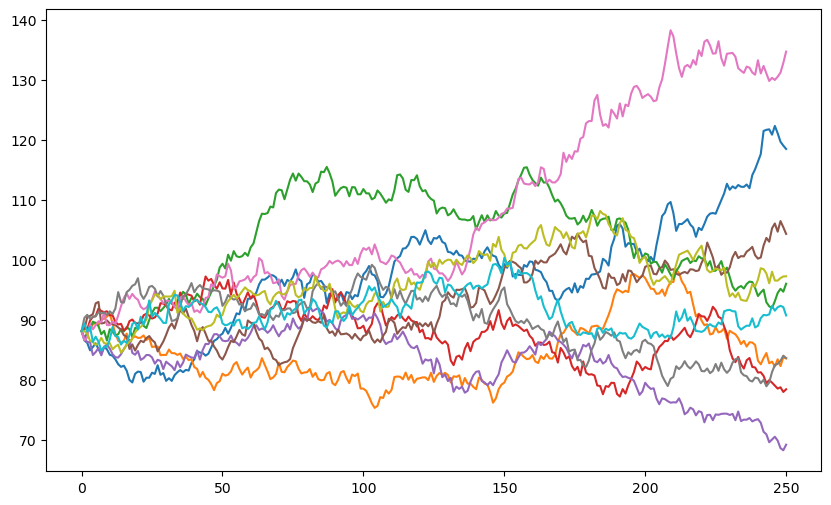

In [20]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);

In [21]:
p = np.maximum(S[-1] - 110, 0)

In [22]:
p

array([ 8.50300793,  0.        ,  0.        , ..., 14.65555597,
        0.        ,  0.        ])

In [23]:
p.shape

(10000,)

In [24]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

1.1461425489434982